In [26]:
library(viridis)
library(fields)

Loading required package: spam
Loading required package: dotCall64
Loading required package: grid
Spam version 2.1-1 (2017-07-02) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.

Attaching package: ‘spam’

The following objects are masked from ‘package:base’:

    backsolve, forwardsolve

Loading required package: maps


In [2]:
site<-'NZSIBT'
LT50<-33.3

In [3]:
basefolder <- paste("../processedoutput/historical/", site, "/", sep="")
mtfiles<-list.files(basefolder)

In [9]:
for(a in 1:length(mtfiles)){
#a<-1
    height<-substr(mtfiles[a], 16, 18)
    print(paste(height, 'cm'))
    
    data<-read.table(paste(basefolder, mtfiles[a], sep=""), header=TRUE)
    data$year<-substr(data$Date, 1, 4)
    data<-subset(data, data$year>=1997)
    data$yearmonth<-substr(data$Date, 1, 7)
    
    Tmax<-aggregate(data$Temp, list(data$yearmonth), max)
    colnames(Tmax)<-c('yearmonth', 'Tmax')

    if(a==1){
        MaxTemp <- Tmax        
        
    }else{
        
        MaxTemp[,(a+1)] <- Tmax[,2]
        
    }
    
    colnames(MaxTemp)[a+1] <- height
}

[1] "050 cm"
[1] "060 cm"
[1] "070 cm"
[1] "080 cm"
[1] "090 cm"
[1] "100 cm"
[1] "110 cm"
[1] "120 cm"
[1] "130 cm"
[1] "140 cm"
[1] "150 cm"
[1] "160 cm"
[1] "170 cm"
[1] "180 cm"
[1] "190 cm"
[1] "200 cm"
[1] "210 cm"
[1] "220 cm"
[1] "230 cm"
[1] "240 cm"
[1] "250 cm"


In [10]:
head(MaxTemp)

yearmonth,050,060,070,080,090,100,110,120,130,⋯,160,170,180,190,200,210,220,230,240,250
1997-01,33.6,33.9,34.7,34.9,35.5,35.6,35.8,37.2,38.3,⋯,39.6,40.0,40.1,40.2,40.2,40.2,40.2,40.2,40.2,40.2
1997-02,38.3,38.6,38.6,38.6,38.9,38.9,38.9,39.1,39.1,⋯,39.3,41.1,41.2,41.3,41.4,41.4,41.4,41.4,41.4,41.4
1997-03,33.6,35.2,35.2,35.2,36.1,36.1,36.1,36.8,36.8,⋯,36.9,36.9,36.9,36.9,37.0,37.1,37.1,37.1,37.1,37.1
1997-04,30.5,30.6,30.6,30.6,30.6,30.7,30.7,30.7,30.7,⋯,30.8,31.1,31.2,33.9,34.1,34.1,34.3,34.3,35.9,35.9
1997-05,28.0,28.0,28.0,28.1,28.1,28.1,28.1,28.1,28.1,⋯,28.1,28.2,28.2,28.2,28.3,28.3,28.3,28.3,28.3,28.3
1997-06,21.1,21.1,21.1,21.2,21.2,21.3,21.2,21.5,21.5,⋯,21.4,21.4,21.4,21.4,21.4,22.0,22.0,22.0,22.0,22.0


In [23]:
MaxTemp<-as.matrix(MaxTemp)

In [44]:
max(MaxTemp)

[1] 49

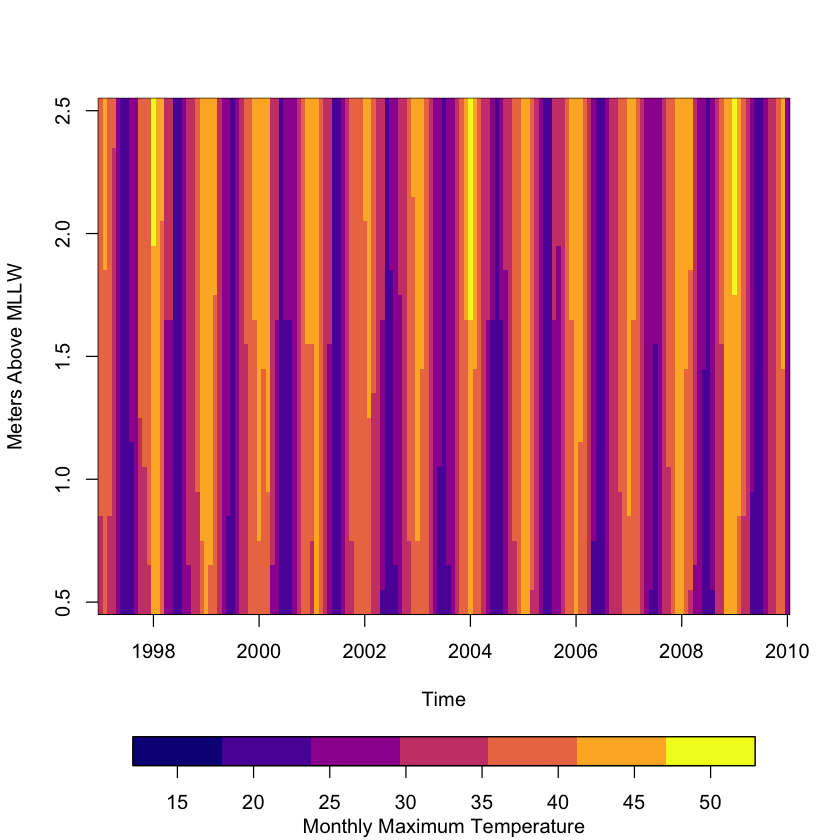

In [46]:
ticks<-c(15,20,25,30,35,40,45,50)

image.plot(z=MaxTemp, zlim=c(15,50), col=plasma(7), xlab="Time", ylab="Meters Above MLLW", 
           nlevel=7, x=seq(1997, 2010, len=nrow(MaxTemp)), y=seq(0.50,2.50,0.10), 
           legend.lab="Monthly Maximum Temperature", horizontal=TRUE, axis.args=list(at=ticks))

In [17]:
par(plt = c(0.2,0.95,0.60,0.95), #c(left, right, bottom, top)  
    las = 1,                      # orientation of axis labels
    cex.axis = 1,                 # size of axis annotation
    tck = -0.04,
    xaxs="i",
    yaxs="i")


